In [26]:
#!pip install axelrod
%matplotlib inline

import axelrod as axl

In [27]:
from axelrod.action import Action
from axelrod.player import Player
from axelrod.random_ import random_choice

C, D = Action.C, Action.D

class RandomPavlovImproved(Player):

    name = "RandomPavlovImproved"
    classifier = {
        "memory_depth": 1,  # Memory-one Four-Vector = (p, p, p, p)
        "stochastic": True,
        "makes_use_of": set(),
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, p: float = 0.5) -> None:
        """
        Parameters
        ----------
        p, float
            The probability to cooperate

        Special Cases
        -------------
        Random(0) is equivalent to Defector
        Random(1) is equivalent to Cooperator
        """
        super().__init__()
        self.p = p
        if p in [0, 1]:
            self.classifier["stochastic"] = False

    def strategy(self, opponent: Player) -> Action:
        # First move
        if len(self.history) == 0:
            return random_choice(self.p)
        elif self.p > 0.7:
            return random_choice(self.p)
        elif (self.history[-1] == C and opponent.history[-1] == C):
            return C
        elif (self.history[-1] == D and opponent.history[-1] == C):
            return D
        elif (self.history[-1] == C and opponent.history[-1] == D):
            return D
        elif (self.history[-1] == D and opponent.history[-1] == D):
            return C
        return random_choice(self.p)





Playing matches:   0%|          | 0/21 [00:00<?, ?it/s]


Playing matches:  19%|█▉        | 4/21 [00:00<00:00, 39.89it/s]


Playing matches:  33%|███▎      | 7/21 [00:00<00:00, 34.23it/s]


Playing matches:  52%|█████▏    | 11/21 [00:00<00:00, 32.96it/s]


Playing matches:  67%|██████▋   | 14/21 [00:00<00:00, 31.66it/s]


Playing matches:  81%|████████  | 17/21 [00:00<00:00, 28.68it/s]


Playing matches: 100%|██████████| 21/21 [00:00<00:00, 26.82it/s]



Analysing:   0%|          | 0/25 [00:00<?, ?it/s]


Analysing: 100%|██████████| 25/25 [00:00<00:00, 180.90it/s]A


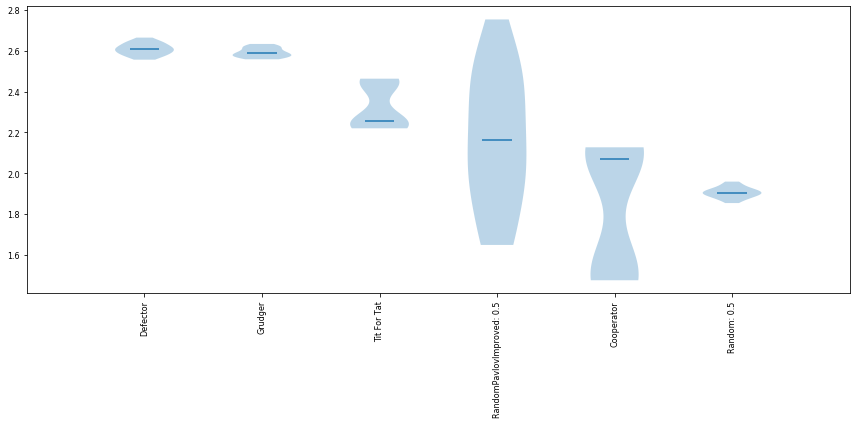

In [40]:
axl.seed(0)  # Make this reproducible
players = [
    axl.TitForTat(),
    axl.Defector(),
    axl.Cooperator(),
    axl.Grudger(),
    axl.Random(),
    RandomPavlovImproved(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();




Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]


Playing matches: 100%|██████████| 3/3 [00:00<00:00, 19.06it/s]



Analysing:   0%|          | 0/25 [00:00<?, ?it/s]


Analysing: 100%|██████████| 25/25 [00:00<00:00, 221.60it/s]A


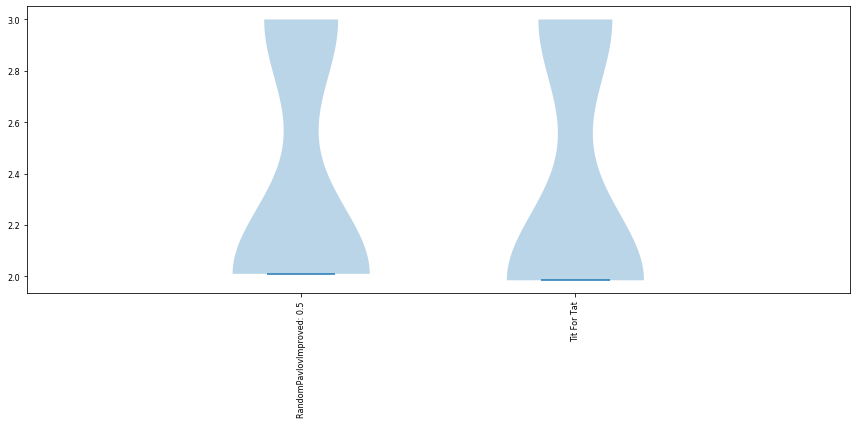

In [39]:
axl.seed(0)  # Make this reproducible
players = [
    axl.TitForTat(),
    RandomPavlovImproved(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();




Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]


Playing matches: 100%|██████████| 3/3 [00:00<00:00, 14.71it/s]



Analysing:   0%|          | 0/25 [00:00<?, ?it/s]


Analysing: 100%|██████████| 25/25 [00:00<00:00, 197.87it/s]A


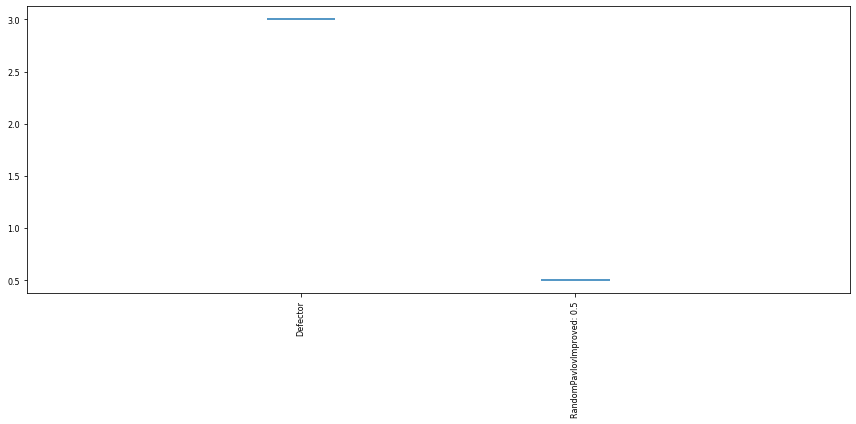

In [38]:
axl.seed(0)  # Make this reproducible
players = [
    axl.Defector(),
    RandomPavlovImproved(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();




Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]


Playing matches: 100%|██████████| 3/3 [00:00<00:00, 23.51it/s]



Analysing:   0%|          | 0/25 [00:00<?, ?it/s]


Analysing: 100%|██████████| 25/25 [00:00<00:00, 215.91it/s]


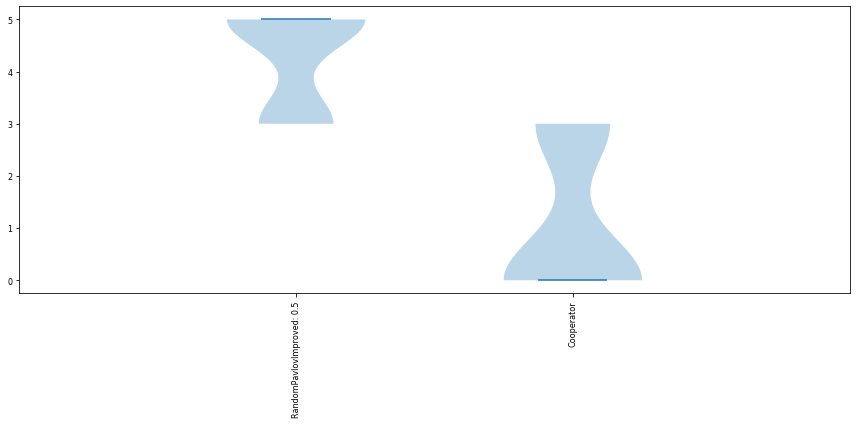

In [32]:
axl.seed(0)  # Make this reproducible
players = [
    axl.Cooperator(),
    RandomPavlovImproved(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();




Playing matches:   0%|          | 0/3 [00:00<?, ?it/s]


Playing matches: 100%|██████████| 3/3 [00:00<00:00, 21.91it/s]



Analysing:   0%|          | 0/25 [00:00<?, ?it/s]


Analysing: 100%|██████████| 25/25 [00:00<00:00, 182.17it/s]A


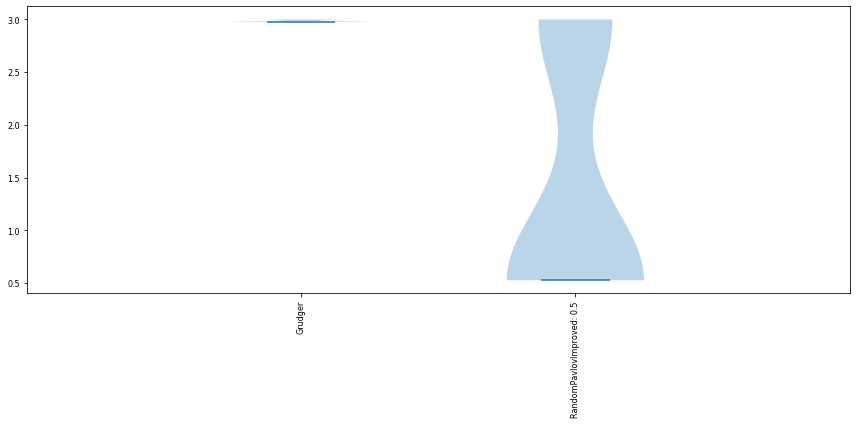

In [37]:
axl.seed(0)  # Make this reproducible
players = [
    axl.Grudger(),
    RandomPavlovImproved(),
]
tournament = axl.Tournament(players, turns=200, repetitions=20)
results = tournament.play()
plot = axl.Plot(results)
plot.boxplot();

### All in all we can see that my strategy works good against #cooperator and close to TitForTat
### Interesting that my strategy works bad against of Defector and  Grim-trigger(Grunder)